# Import liabraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Extract the data

In [2]:
path=r'C:\Users\sahoo\Desktop\Models\HSI_classification_Canady_Space_Centre'

X=loadmat(path+"/KSC.mat")['KSC']
Y=loadmat(path+"/KSC_gt.mat")['KSC_gt']

X.shape,Y.shape

((512, 614, 176), (512, 614))

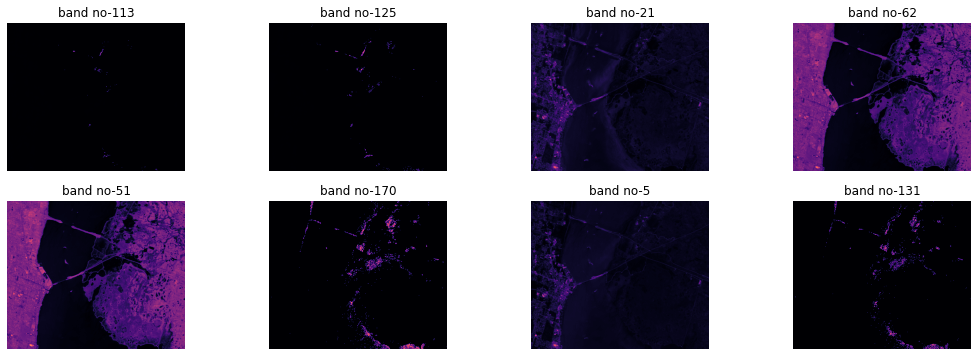

In [3]:
sns.axes_style('whitegrid')
fig=plt.figure(figsize=(18,6))
for i in range(1,1+8):
    fig.add_subplot(2,4,i)
    ran_val=np.random.randint(X.shape[2])
    plt.imshow(X[:,:,ran_val], cmap='magma')
    plt.axis("off")
    plt.title(f'band no-{ran_val}')

jet' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

In [3]:
X.shape

(512, 614, 176)

In [3]:
mixed=X.reshape(-1,X.shape[2])
y_final=Y.reshape(-1,) #or y.revel()
d=pd.DataFrame(mixed)
d['Class']=y_final

d

,0,1,2,3,4,5,6,7,8,9,...,167,168,169,170,171,172,173,174,175,Class
0,11,26,19,16,20,25,27,33,36,39,...,75,75,74,70,74,63,63,64,58,0
1,4,22,10,7,11,14,19,24,25,29,...,47,45,54,44,47,47,38,44,43,0
2,6,16,9,7,12,15,16,22,24,26,...,56,70,59,59,63,59,48,47,49,0
3,19,33,21,18,24,26,30,37,39,44,...,116,116,122,117,115,116,103,113,89,0
4,17,39,31,28,35,39,41,49,52,55,...,165,167,169,156,158,154,147,140,123,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314363,22,40,29,26,29,30,32,37,37,39,...,42,49,49,40,37,43,40,43,38,0
314364,26,40,31,26,32,33,34,39,41,43,...,46,43,44,37,41,37,36,28,28,0
314365,18,39,29,28,28,30,33,37,37,39,...,37,38,46,40,37,30,25,31,25,0
314366,22,38,27,22,28,28,31,35,36,39,...,44,38,46,40,35,37,33,40,28,0


In [4]:
d['Class'].unique()

array([ 0,  8, 12, 13, 11,  5,  1,  4,  6,  2,  3, 10,  7,  9],
      dtype=uint8)

<AxesSubplot:ylabel='None'>

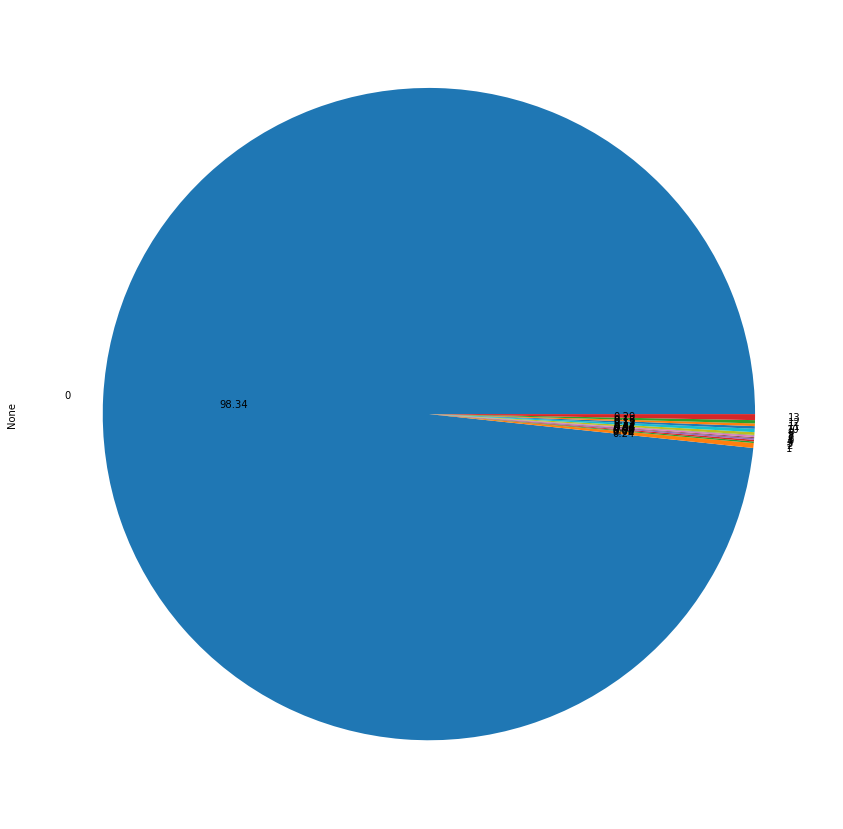

In [7]:
plt.figure(figsize=(15,15))

d.groupby('Class').size().plot(kind='pie',autopct='%.2f')

In [8]:
val=d.groupby('Class').size()
val

Class
0     309157
1        761
2        243
3        256
4        252
5        161
6        229
7        105
8        431
9        520
10       404
11       419
12       503
13       927
dtype: int64

In [ ]:
d['Class'].plot(kind='bar')

In [9]:
d

,0,1,2,3,4,5,6,7,8,9,...,167,168,169,170,171,172,173,174,175,Class
0,11,26,19,16,20,25,27,33,36,39,...,75,75,74,70,74,63,63,64,58,0
1,4,22,10,7,11,14,19,24,25,29,...,47,45,54,44,47,47,38,44,43,0
2,6,16,9,7,12,15,16,22,24,26,...,56,70,59,59,63,59,48,47,49,0
3,19,33,21,18,24,26,30,37,39,44,...,116,116,122,117,115,116,103,113,89,0
4,17,39,31,28,35,39,41,49,52,55,...,165,167,169,156,158,154,147,140,123,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314363,22,40,29,26,29,30,32,37,37,39,...,42,49,49,40,37,43,40,43,38,0
314364,26,40,31,26,32,33,34,39,41,43,...,46,43,44,37,41,37,36,28,28,0
314365,18,39,29,28,28,30,33,37,37,39,...,37,38,46,40,37,30,25,31,25,0
314366,22,38,27,22,28,28,31,35,36,39,...,44,38,46,40,35,37,33,40,28,0


In [8]:
x=d.drop('Class',axis=1)
y=d['Class']

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.25)
x_train=np.array(x_train)
x_test=np.array(x_test)

In [8]:
x_train.shape

(235776, 176)

# Case-1: With PCA

In [13]:
new_x_train=PCA(n_components=50).fit_transform(x_train)
new_x_test=PCA(n_components=50).fit_transform(x_test)

In [14]:
len(new_x_train[0])

50

In [15]:
clf1=RandomForestClassifier().fit(new_x_train,y_train)
y_pred1=clf1.predict(new_x_test)

In [16]:
len(y_test),len(y_pred1)

(78592, 78592)

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("Accuracy: ",accuracy_score(y_test,y_pred1))
print("\nConfusion Matrix:\n ",confusion_matrix(y_test,y_pred1))

Accuracy:  0.9832043973941368

Confusion Matrix:
  [[77272     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [  196     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [   58     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [   62     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [   56     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [   33     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [   56     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [   16     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [  126     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [  136     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [  101     0     0     0     0     0     0     0     0    

In [22]:
new_x_train[0]

array([-3.47613424e+03,  2.47517280e+02,  1.65534841e+03,  2.86408274e+02,
        7.60240690e+01,  5.29576706e+01, -2.05131380e+01, -2.59240062e+01,
        1.95873141e+00,  3.90793325e+00, -1.58192537e+01, -1.19073359e+01,
       -6.84959522e+00, -9.28572406e+00,  2.13863036e+01,  2.18910278e+01,
        6.82879165e-01, -8.75615365e+00,  1.41494622e+01,  2.83950824e+00,
       -9.40047244e+00,  7.33192749e+00,  2.55767863e+00, -3.79430827e+01,
        2.17744990e+01,  1.59031321e+01,  7.88350609e-01,  4.34818263e+01,
        1.62643042e+01,  5.51030341e+01, -7.47284425e+01, -3.96356625e+00,
        5.13548926e+00, -1.99146748e+00, -1.93251063e+01, -2.50106770e+01,
       -2.07146191e+01,  1.61095948e+01,  2.32693230e+00,  4.29040014e+00,
       -2.30817792e-01, -1.11211378e+01, -2.27398421e+01, -7.56327728e+00,
        9.33103673e+00,  3.69503119e-01,  1.88673583e+01,  4.60337505e+01,
        7.74494971e+01, -2.27218124e+01, -1.05267349e+01, -2.35279881e+01,
        1.03528696e+00, -

## Display the bands after PCA

In [18]:
reduced_data=pd.concat([pd.DataFrame(data = new_x_train), pd.DataFrame(data = y.ravel())], axis = 1)

In [19]:
reduced_data.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,0
0,-3476.134244,247.517306,1655.348469,286.408541,76.024034,52.958640,-20.510977,-25.928371,1.959529,3.893707,...,-11.607405,-22.638660,-6.946093,7.119792,0.033750,-9.086057,43.549237,80.655169,-20.040114,0
1,-3848.869483,-36.662396,1431.786167,65.651561,-7.488103,-374.736210,-211.760456,-179.229991,92.924298,-36.636405,...,0.602915,17.927346,10.871848,-17.140640,17.173542,24.690307,-90.836274,-131.152553,24.734941,0
2,-3828.044512,-34.387425,1444.645790,74.608647,1.821533,-347.405953,-209.540950,-180.891366,98.932394,-37.642647,...,2.311055,17.406935,9.912965,-15.375887,16.323066,19.900151,-87.499203,-126.515907,22.469824,0
3,-3582.697236,192.248460,1609.403717,255.499299,62.207463,2.193459,-46.383793,-52.969858,8.834792,-1.343037,...,-13.997536,-19.720748,-11.210473,3.591904,-1.453124,-8.905509,37.919817,70.627704,-18.260245,0
4,-3810.481437,-16.292297,1444.490245,83.133665,2.838260,-341.024807,-206.716989,-180.284316,89.963306,-29.497976,...,4.303831,16.093771,10.080694,-16.115052,16.439800,22.234288,-84.670725,-121.480983,21.976494,0


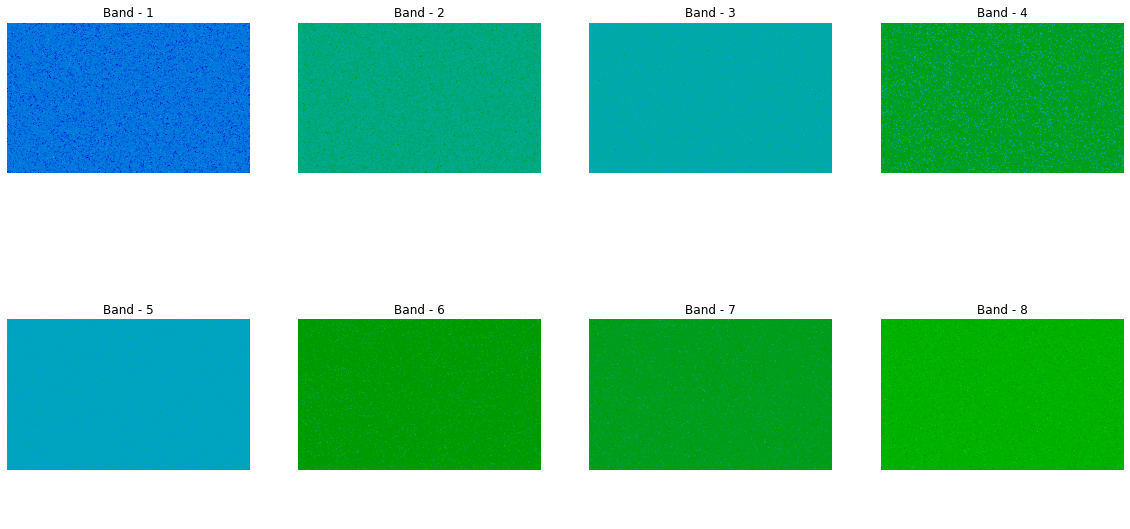

In [32]:
fig = plt.figure(figsize = (20, 10))

for i in range(1, 1+8):
    fig.add_subplot(2,4, i)
    plt.imshow(reduced_data.loc[:,i].values.reshape(512, 614), cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band - {i}')

# Case-2: With MNF

In [5]:
from spectral import *

In [10]:
x

,0,1,2,3,4,5,6,7,8,9,...,166,167,168,169,170,171,172,173,174,175
0,11,26,19,16,20,25,27,33,36,39,...,71,75,75,74,70,74,63,63,64,58
1,4,22,10,7,11,14,19,24,25,29,...,47,47,45,54,44,47,47,38,44,43
2,6,16,9,7,12,15,16,22,24,26,...,59,56,70,59,59,63,59,48,47,49
3,19,33,21,18,24,26,30,37,39,44,...,113,116,116,122,117,115,116,103,113,89
4,17,39,31,28,35,39,41,49,52,55,...,145,165,167,169,156,158,154,147,140,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314363,22,40,29,26,29,30,32,37,37,39,...,49,42,49,49,40,37,43,40,43,38
314364,26,40,31,26,32,33,34,39,41,43,...,42,46,43,44,37,41,37,36,28,28
314365,18,39,29,28,28,30,33,37,37,39,...,34,37,38,46,40,37,30,25,31,25
314366,22,38,27,22,28,28,31,35,36,39,...,44,44,38,46,40,35,37,33,40,28


(512, 614, 176)
(512, 614, 150)


ImageView object:
  Display bands       :  [0, 75.0, 149]
  Interpolation       :  <default>
  RGB data limits     :
    R: [-6.926900021236033, 2.1157250847397324]
    G: [-6.794760042793801, 7.2321107274784175]
    B: [-0.0014981953868355932, 0.0004591717614327785]

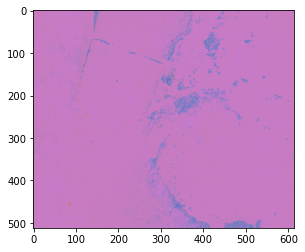

In [11]:
signal = calc_stats(X)
noise = noise_from_diffs(X)
mnfr = mnf(signal, noise)

denoised = mnfr.denoise(X, snr=10)

print(denoised.shape)

mnf_data = mnfr.reduce(X, snr=10)
mnf_data= mnfr.reduce(X, num=150)
print(mnf_data.shape)
imshow(mnf_data)

In [12]:
mnf_mixed=mnf_data.reshape(-1,mnf_data.shape[2])
mnf_d=pd.DataFrame(mnf_mixed)
mnf_d['Class']=y

mnf_d

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,Class
0,0.133067,-0.042523,-0.024173,-0.001478,0.002357,0.003739,0.003827,-0.001630,0.002958,0.004090,...,0.000028,-0.000008,-0.000081,0.000047,-0.000038,0.000021,-0.000051,-0.000090,-0.000153,0
1,0.133270,-0.042405,-0.024596,-0.000981,0.002600,0.003785,0.004214,-0.001392,0.003220,0.003966,...,-0.000027,-0.000099,-0.000133,0.000058,-0.000161,-0.000009,-0.000020,0.000151,-0.000182,0
2,0.132877,-0.042747,-0.023941,-0.001212,0.002505,0.004238,0.003934,-0.001696,0.003469,0.003940,...,0.000151,0.000062,-0.000127,0.000018,-0.000197,0.000007,0.000056,-0.000055,-0.000019,0
3,0.133030,-0.042342,-0.024086,-0.001754,0.002944,0.003593,0.003666,-0.001407,0.003147,0.003741,...,0.000057,0.000091,0.000037,0.000113,-0.000069,-0.000011,-0.000001,0.000076,-0.000094,0
4,0.133043,-0.042529,-0.024338,-0.002140,0.002191,0.003776,0.003535,-0.001122,0.002428,0.003529,...,-0.000177,0.000083,0.000002,0.000078,0.000042,-0.000063,-0.000019,-0.000201,0.000095,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314363,0.133386,-0.042112,-0.024449,-0.001351,0.002118,0.003291,0.003884,-0.001388,0.003175,0.003743,...,-0.000155,-0.000030,-0.000069,-0.000029,-0.000013,0.000295,-0.000052,-0.000013,0.000080,0
314364,0.133665,-0.042074,-0.024054,-0.001692,0.001888,0.003990,0.004062,-0.001692,0.002927,0.003930,...,0.000107,-0.000003,-0.000070,0.000085,0.000078,-0.000150,0.000051,-0.000006,-0.000057,0
314365,0.133809,-0.042377,-0.024024,-0.001366,0.002300,0.003705,0.003609,-0.001218,0.002894,0.004155,...,-0.000107,-0.000066,-0.000094,-0.000019,-0.000167,-0.000044,-0.000078,-0.000077,-0.000033,0
314366,0.133675,-0.041907,-0.024402,-0.001457,0.002509,0.003486,0.003854,-0.001540,0.002935,0.003843,...,0.000140,0.000063,0.000002,0.000078,0.000032,0.000067,0.000017,-0.000032,-0.000037,0


In [18]:
mnf_x=mnf_d.drop('Class',axis=1)
mnf_y=mnf_d['Class']

mnf_x_train,mnf_x_test,mnf_y_train,mnf_y_test=train_test_split(mnf_x,mnf_y,random_state=0,test_size=0.25)
mnf_x_train=np.array(mnf_x_train)
mnf_x_test=np.array(mnf_x_test)

clf2=RandomForestClassifier().fit(mnf_x_train,mnf_y_train)
y_pred2=clf2.predict(mnf_x_test)

In [22]:
accuracy_score(y_pred2,mnf_y_test)

0.9833061889250815

# Case-3: Without any reduction technique

In [27]:
x

,0,1,2,3,4,5,6,7,8,9,...,166,167,168,169,170,171,172,173,174,175
0,11,26,19,16,20,25,27,33,36,39,...,71,75,75,74,70,74,63,63,64,58
1,4,22,10,7,11,14,19,24,25,29,...,47,47,45,54,44,47,47,38,44,43
2,6,16,9,7,12,15,16,22,24,26,...,59,56,70,59,59,63,59,48,47,49
3,19,33,21,18,24,26,30,37,39,44,...,113,116,116,122,117,115,116,103,113,89
4,17,39,31,28,35,39,41,49,52,55,...,145,165,167,169,156,158,154,147,140,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314363,22,40,29,26,29,30,32,37,37,39,...,49,42,49,49,40,37,43,40,43,38
314364,26,40,31,26,32,33,34,39,41,43,...,42,46,43,44,37,41,37,36,28,28
314365,18,39,29,28,28,30,33,37,37,39,...,34,37,38,46,40,37,30,25,31,25
314366,22,38,27,22,28,28,31,35,36,39,...,44,44,38,46,40,35,37,33,40,28


In [28]:
y

0         0
1         0
2         0
3         0
4         0
         ..
314363    0
314364    0
314365    0
314366    0
314367    0
Name: Class, Length: 314368, dtype: uint8

In [10]:
x_train.shape,y_train.shape

((235776, 176), (235776,))

In [23]:
clf3=RandomForestClassifier().fit(x_train,y_train)
y_pred3=clf3.predict(x_test)

In [25]:
accuracy_score(y_pred3,y_test)

0.9832043973941368

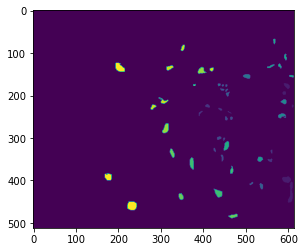

In [70]:
cmap='magma'
plt.imshow(Y,)

In [65]:
ex=loadmat("C:/Users/sahoo/Downloads/Botswana_gt.mat")['Botswana_gt']
ex


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

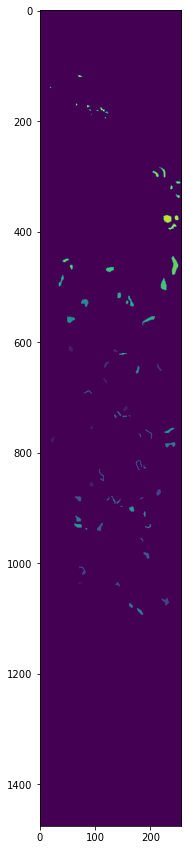

In [67]:
plt.figure(figsize=(10,15))
plt.imshow(ex)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

#clf=[]
li=[LogisticRegression(),     SVC(),                        KNeighborsClassifier(), DecisionTreeClassifier,
    RandomForestClassifier(), GradientBoostingClassifier(), AdaBoostClassifier(),   XGBClassifier()]
acc=[]
print("Training....")
for i in range(len(li)):
    clf=li[i].fit(mnf_x_train, mnf_y_train)
    pred=clf.predict(mnf_x_test)
    accuracy=accuracy_score(mnf_y_test,pred)
    acc.append(accuracy)
    print("{0}-done".format(i))
print("Done!")


acc

Training....


D:\Anaconda\envs\MyEnv\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0-done
1-done
